-> Chargement des librairies et fonctions

In [1]:
# fonctions utilities (affichage, confusion, etc.)
from Fonction.MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *

from Fonction.AllModels import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-> Chargement des données brutes

In [2]:
# Init_train = pd.read_csv('./Data_brut/HAI817_Projet_train.csv', sep=",")
# Init_test = pd.read_csv('./Data_brut/HAI817_Projet_test.csv', sep=",")
# Init_Alle = pd.read_csv('./Data_brut/data_allemand_all.csv', sep=",")
#
#
# data_brute = pd.concat([Init_train,Init_test,Init_Alle], ignore_index = True)
#
# for i in range(0,len(data_brute['our rating'])):
#  if data_brute['our rating'][i] == 'Other':
#      data_brute['our rating'][i] = 'other'
#
# data_brute = data_brute.drop_duplicates()
# print(data_brute['our rating'].value_counts())
#
# data_equilibre = balanceSample(data_brute,210,["false","true","mixture","other"])
# print(data_equilibre['our rating'].value_counts())
# data_equilibre.to_csv('./Data_equilibre/MyData_Sprint2.csv', sep=',', index=False)

mySample = pd.read_csv('./Data_equilibre/MyData_Sprint2.csv', sep=",")
print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

false      210
true       210
mixture    210
other      210
Name: our rating, dtype: int64


-> Je test tout les models

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.487 (0.057) in 1.060 s
Evaluation de  LR
LR : 0.532 (0.053) in 18.614 s
Evaluation de  KNN
KNN : 0.411 (0.046) in 1.451 s
Evaluation de  CART
CART : 0.431 (0.053) in 21.979 s
Evaluation de  RF
RF : 0.500 (0.063) in 23.280 s
Evaluation de  SVM
SVM : 0.543 (0.051) in 794.879 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.543  (0.051)  en 794.879   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.543  (0.051)  en 794.879   s
Classifier :  LR  accuracy : 0.532  (0.053)  en 18.614   s
Classifier :  RF  accuracy : 0.500  (0.063)  en 23.280   s
Classifier :  MultinomialNB  accuracy : 0.487  (0.057)  en 1.060   s
Classifier :  CART  accuracy : 0.431  (0.053)  en 21.979   s
Classifier :  KNN  accuracy : 0.411  (0.046)  en 1.451   s


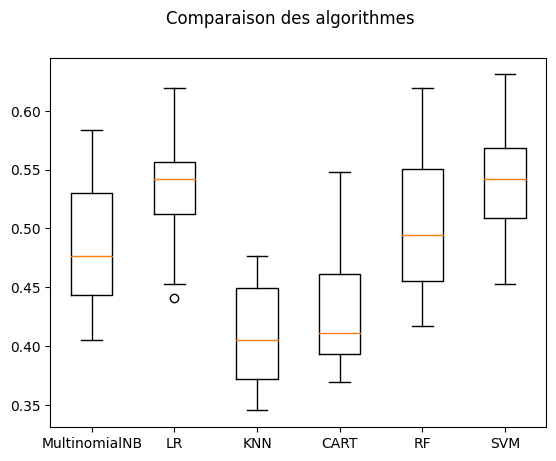

In [3]:
testAllModel(X_train,y_train,5)

-> je test les hyper-parametres de SVC

In [4]:
testSVC(X_train,y_train)

Application de gridsearch ...
pipeline : ['tfidf', 'svm']
parameters :
{'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 80 candidates, totalling 400 fits
réalisé en  164.661 s
Meilleur résultat : 0.526
Ensemble des meilleurs paramètres :
	svm__C: 1
	svm__gamma: 1
	svm__kernel: 'rbf'

Les premiers résultats : 
     svm__C  svm__gamma svm__kernel  accuracy
61     1.0       1.000         rbf  0.526190
73    10.0       0.100         rbf  0.526190
77    10.0       1.000         rbf  0.525000
78    10.0       1.000        poly  0.520238
48     1.0       0.001      linear  0.516667


-> Ajuster pretraitement

In [5]:
ajustSVC(X_train, y_train,[10,1],[1,0.1],['rbf'])

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mathi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [10, 1], 'svm__gamma': [1, 0.1], 'svm__kernel': ['rbf']}
Fitting 5 folds for each of 64 candidates, totalling 320 fits
réalisé en  342.499 s
Meilleur résultat : 0.531
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	svm__C: 10
	svm__gamma: 0.1
	svm__kernel: 'rbf'
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
39                      False                  True      10         0.1   
32                      False                  True      10         1.0   
57                      False                 False       1         1.0   
37                      False                  True      

-> enregistrement du modele SVC

Sauvegarde du modèle dans  ./Modele/Sprint2/SentimentModel_Sprint2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('svm', SVC(C=10, gamma=0.1))])
Accuracy : 0.619
Classification Report
              precision    recall  f1-score   support

       false    0.68000   0.80952   0.73913        21
     mixture    0.52381   0.68750   0.59459        16
       other    0.80952   0.54839   0.65385        31
        true    0.41176   0.43750   0.42424        16

    accuracy                        0.61905        84
   macro avg    0.60627   0.62073   0.60295        84
weighted avg    0.64696   0.61905   0.62015        84



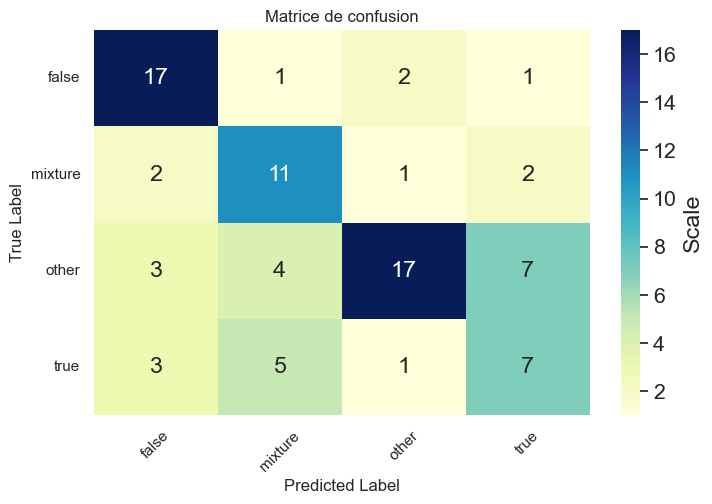

In [3]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('svm', SVC(C=10, gamma=0.1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint2/SentimentModel_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Second Modèle

In [7]:
testRFC(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
réalisé en  305.769 s
Meilleur résultat : 0.512
Ensemble des meilleurs paramètres :
	rfc__max_depth: 25
	rfc__min_samples_leaf: 2
	rfc__min_samples_split: 15
	rfc__n_estimators: 500

Les premiers résultats : 
     rfc__max_depth  rfc__min_samples_leaf  rfc__min_samples_split  \
19              30                      2                       5   
10              25                      2                      15   
3               25                      1                      10   
1               25                      1                       5   
8               25                      2                      10   

    rfc__n_estimators  accuracy  
19               1200  0.511905  
10                500  0.511

In [8]:
ajustRFC(X_train, y_train,[1200,500],[30,25],[5,15],[2])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [1200, 500], 'rfc__max_depth': [30, 25], 'rfc__min_samples_split': [5, 15], 'rfc__min_samples_leaf': [2]}
Fitting 5 folds for each of 128 candidates, totalling 640 fits
réalisé en  1524.339 s
Meilleur résultat : 0.518
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	rfc__max_depth: 30
	rfc__min_samples_leaf: 2
	rfc__min_samples_split: 15
	rfc__n_estimators: 500
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
101                      False                 False              30   
78                       False                  True              30   
67                       

Sauvegarde du modèle dans  ./Modele/Sprint2/RandomForestClassifier_Sprint2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                                        min_samples_split=5,
                                        n_estimators=500))])
Accuracy : 0.619
Classification Report
              precision    recall  f1-score   support

       false    0.77778   0.66667   0.71795        21
     mixture    0.50000   0.75000   0.60000        16
       other    0.76190   0.51613   0.61538        31
        true    0.47619   0.62500   0.54054        16

    accuracy                        0.61905        84
   macro avg    0.62897   0.63945   0.61847        84
weighted avg    0.66156   0.61905   0.62384        84



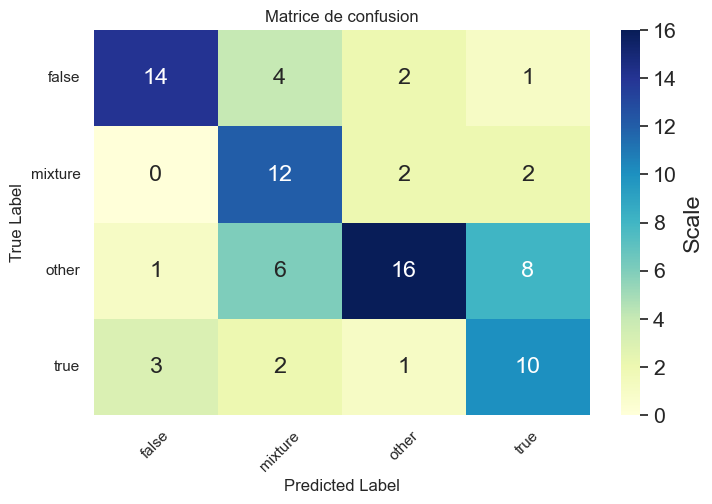

In [9]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)  # stratified = yes

## double classification a regarder
pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=30,min_samples_leaf=2, min_samples_split=5, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint2/RandomForestClassifier_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

Dans ce rapport de classification, la précision représente le taux de prédictions correctes pour chaque classe. Le rappel mesure le taux de vrais positifs prédits pour chaque classe, par rapport au nombre total de vrais positifs réels pour cette classe. Le score F1 est une mesure de la précision et du rappel combinés, qui donne une indication de la performance globale du modèle pour chaque classe.

L'exactitude globale (accuracy) du modèle est de 0,619, ce qui signifie que 61,9% des prédictions du modèle sont correctes.

En ce qui concerne les résultats pour chaque classe, on peut voir que le modèle est relativement bon pour prédire la classe "false" avec une précision de 0,78 et un rappel de 0,67. Il est également assez bon pour prédire la classe "other" avec une précision de 0,76, mais son rappel est un peu plus faible à 0,52.

Le modèle a des performances plus mitigées pour les classes "mixture" et "true", avec une précision de 0,50 pour la classe "mixture" et une précision de 0,48 pour la classe "true". Les rappels pour ces classes sont de 0,75 pour "mixture" et de 0,62 pour "true".

Le rapport de classification pondéré montre une précision pondérée de 0,66 pour toutes les classes combinées, ce qui signifie que le modèle a une performance moyenne globale.

En résumé, le modèle semble relativement bon pour certaines classes mais pourrait être amélioré pour d'autres. Il pourrait être intéressant de voir si des améliorations peuvent être apportées au modèle pour améliorer ses performances pour les classes "mixture" et "true".

-> Le dernier modele

In [10]:
testLR(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
réalisé en  53.562 s
Meilleur résultat : 0.523
Ensemble des meilleurs paramètres :
	lr__C: 1.0
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'

Les premiers résultats : 
    lr__C lr__penalty lr__solver  accuracy
6    1.0          l2  newton-cg  0.522619
7    1.0          l2      lbfgs  0.521429
0  100.0          l2  newton-cg  0.517857
1  100.0          l2      lbfgs  0.516667
3   10.0          l2  newton-cg  0.516667


In [11]:
ajustLR(X_train, y_train,['lbfgs', 'newton-cg'],['l2'],[1])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['lbfgs', 'newton-cg'], 'lr__penalty': ['l2'], 'lr__C': [1]}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
réalisé en  142.473 s
Meilleur résultat : 0.525
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	lr__C: 1
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
30                      False                 False      1          l2   
31                      False                 False      1          l2   
17                      False                  True      1          l2   
27                      False              

Sauvegarde du modèle dans  ./Modele/Sprint2/LogisticRegression_Sprint2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('lr', LogisticRegression(C=1, solver='newton-cg'))])
Accuracy : 0.595
Classification Report
              precision    recall  f1-score   support

       false    0.72727   0.76190   0.74419        21
     mixture    0.44444   0.75000   0.55814        16
       other    0.80000   0.51613   0.62745        31
        true    0.40000   0.37500   0.38710        16

    accuracy                        0.59524        84
   macro avg    0.59293   0.60076   0.57922        84
weighted avg    0.63790   0.59524   0.59765        84



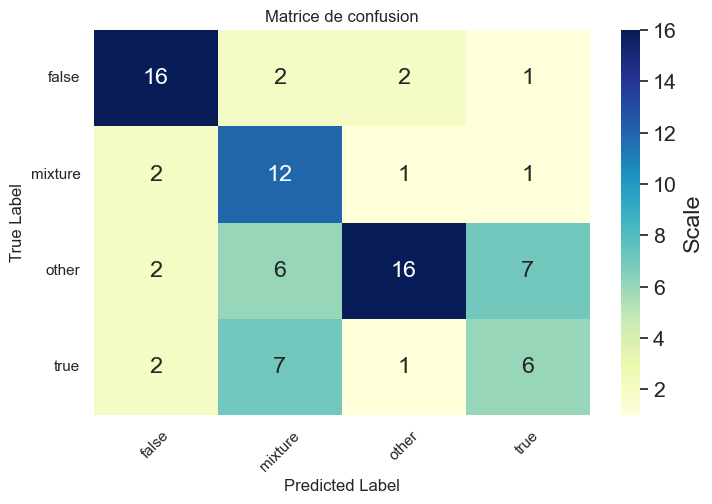

In [12]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('lr', LogisticRegression(C=1,penalty='l2', solver='newton-cg'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint2/LogisticRegression_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)